In [15]:
from ffxiv_stats import Rotation, Rate

import pandas as pd
import numpy as np
from variance import crit_prob, direct_hit_prob, crit_dmg_multiplier

In [14]:
def get_p_vector(p_c, p_d, keep_cd=True):
    """
    Get the probability of each hit type occuring given the probability of a critical hit and direct hit

    inputs:
    p_c: probability of a critical hit landing
    p_d: probability of a direct hit landing
    keep_cd: bool, allow critical-direct hits. If true, the probability is p_c*p_d, otherwise 0

    returns:
    probability of each hit type, [normal hit, critical hit given not CD hit, direct hit given not CD hit, CD hit]
    """

    # Sometimes the probabilities don't sum to exactly 1.0 because of floating point error.
    # Sometimes SciPy's multinomial class will break because of that and just return NaN for probabilities.
    # Using the Decimal class with arbitrary precision and then converting them back to a float remedies this I guess.
    # Floating point math is stupid.
    from decimal import Decimal
    p_c = Decimal(p_c)
    p_d = Decimal(p_d)
    if keep_cd:
        p_cd = Decimal(p_c) * Decimal(p_d)
    
    else:
        p_cd = Decimal(0)

    return np.array([float(Decimal(1.0) - p_c - p_d + p_cd), float(p_c - p_cd), float(p_d - p_cd), float(p_cd)])

In [21]:
crit = 4069
dh = 2919

p_c = crit_prob(crit)
p_d = direct_hit_prob(dh)
l_c = crit_dmg_multiplier(crit)

p = get_p_vector(p_c, p_d)

print(l_c, p)

rotation_df = pd.DataFrame({
    'd2': [13000, 20000, 25000, 35000, 3000],
    'n': [25, 25, 25, 5, 75],
    'p': [p]*5,
    'l_c': [l_c]*5,
    'buffs': [[1.1]]*5,
    'is_dot': [0, 0, 0, 0, 1],
    'action_name': ['test1', 'test2', 'test3', 'test4', 'test5'], 
    'base_action': ['test1', 'test2', 'test3', 'test4', 'test5'] 
})

rotation_df

r = Rotation(rotation_df, t=2.5*75)

1623.0 [0.419479 0.157521 0.307521 0.115479]


In [22]:
r.rotation_mean, r.rotation_std, r.rotation_skewness

(14041.576327627274, 385.36307388345665, 0.12664699407603783)

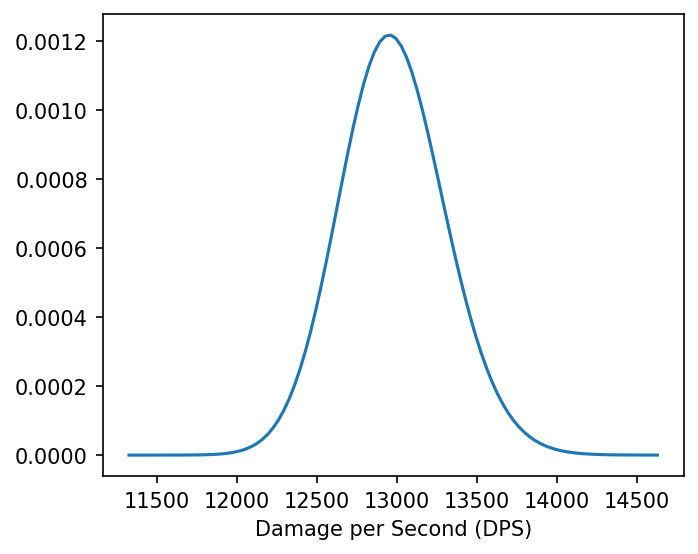

In [19]:
r.plot_rotation_distribution()